In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from lloyds_algo import *

Example of generated data, pandas HTML viz

In [2]:
raw_data = data_generator(seed=0, n=10, dim=9)
X_df = pd.DataFrame(
    raw_data[0], 
    columns=[f'feature_{x}' for x in range(raw_data[0].shape[1])]
)
y_df = pd.DataFrame(
    raw_data[1], 
    columns=['labels']
)
df = pd.concat([X_df,y_df],axis=1)
df

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,labels
0,0.935090,0.031020,1.591243,-0.278850,-0.139979,-0.171053,-0.247535,-0.140479,-0.109157,1.0
1,-0.605402,1.989476,1.110815,-0.548642,0.524417,0.727252,-0.120461,0.036353,0.109197,1.0
2,-0.323227,0.887201,1.907346,0.151007,0.408787,-0.231307,0.257811,0.072447,-0.324506,1.0
3,0.619584,-0.062748,0.104524,-0.114875,-0.003904,0.013320,0.926817,0.334279,0.955888,2.0
4,0.876537,2.414377,0.875949,0.514553,0.504244,0.072870,0.635035,0.072697,0.191284,1.0
5,0.126030,0.008497,0.333885,0.337032,-0.221340,0.045562,0.528865,2.262715,-0.170515,2.0
6,0.136305,-0.205837,-0.473943,-0.070847,-0.132874,0.316174,-0.435828,1.027528,2.120605,2.0
7,0.826930,-0.761652,0.912327,0.385990,-0.423586,0.135464,0.432245,0.355856,-0.113524,1.0
8,-0.171510,-0.543808,-0.183067,-0.230635,1.194007,0.001618,-0.116257,0.549351,0.187717,3.0
9,-0.013049,0.093567,-0.134485,2.426949,1.276997,1.789667,0.101849,0.221484,0.122923,3.0


Calculate rand score across folds.

In [3]:
score_dict, cv_dict = iterative_fit_score_kmeans()
print('\nMean scores =',score_dict) 

*** n100 : chunk : size = 100 : complete ***
*** n200 : chunk : size = 100 : complete ***
*** n300 : chunk : size = 100 : complete ***
*** n400 : chunk : size = 100 : complete ***
*** n500 : chunk : size = 100 : complete ***

Mean scores = {100: 0.7036412999825076, 200: 0.7466001077255748, 300: 0.7679170569425984, 400: 0.7688681487617379, 500: 0.7593674082635069}


Visualize rand score across folds.

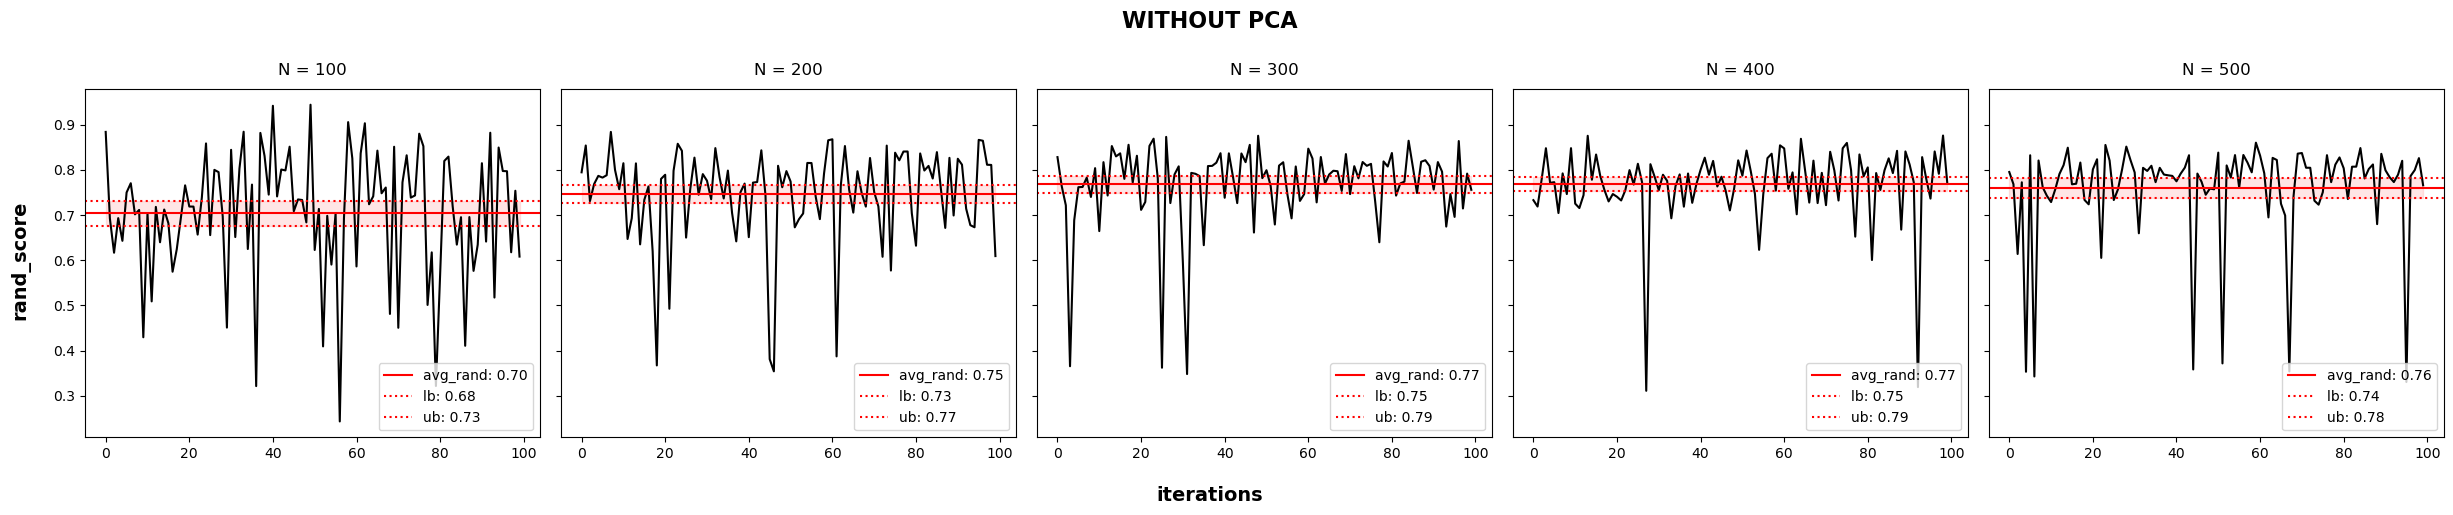

In [4]:
## NO DIMENSION REDUCTION
m = len(cv_dict.keys())
fig, ax = plt.subplots(1,m, figsize=(5*m,5),sharey=True) # modify + return objects

fig, ax = viz_rand_score_over_folds(
    figure = fig, axes = ax,
    verbose = False,
    perform_PCA = False,
    label = "WITHOUT PCA",
    color = "black"
)
plt.savefig('scores_across_folds.png')

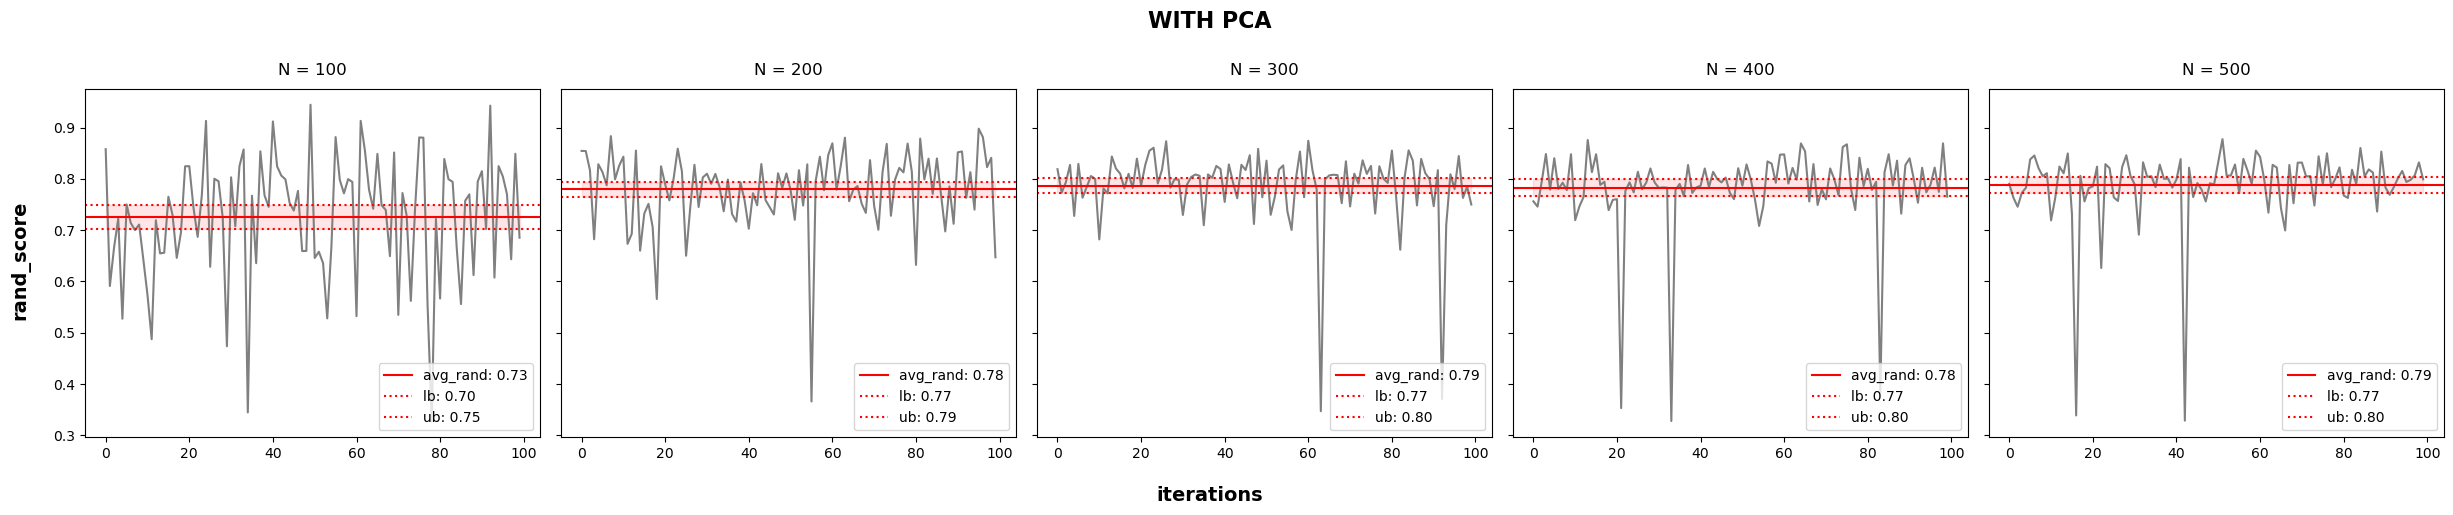

In [5]:
## WITH PCA
m = len(cv_dict.keys())
fig, ax = plt.subplots(1,m, figsize=(5*m,5),sharey=True) # modify + return objects

fig, ax = viz_rand_score_over_folds(
    figure = fig, axes = ax,
    verbose = False,
    perform_PCA = True,
    label = "WITH PCA",
    color = "grey"
)
plt.savefig('scores_across_folds_with_PCA.png')

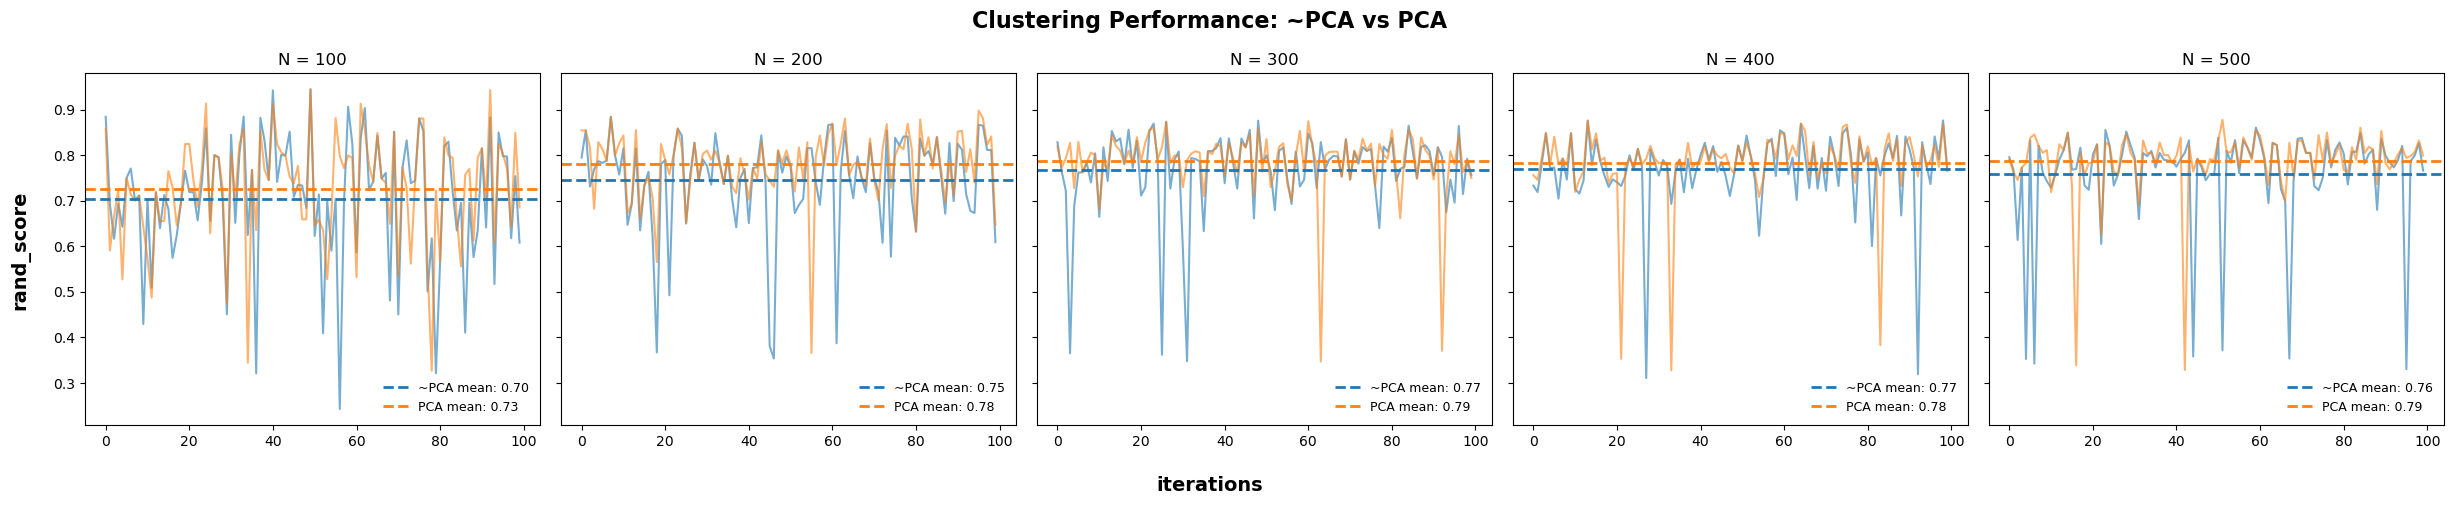

In [6]:
fig, axes = viz_rand_score_over_folds_superimposed(
    K=3,
    n_vals=[100,200,300,400,500],
    seed_vals=[x for x in range(1,101)],
    verbose=False
)
plt.savefig('superimposed.png')